In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


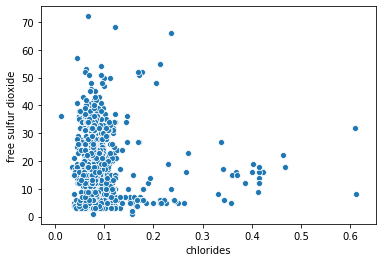

In [3]:
sns.scatterplot(df.chlorides,df['free sulfur dioxide'])
plt.show()

In [4]:
np.corrcoef(df.chlorides,df['free sulfur dioxide'])

array([[1.        , 0.00556215],
       [0.00556215, 1.        ]])

In [5]:
corr_table = df.corr()
corr_table

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
mask = np.zeros_like(corr_table,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

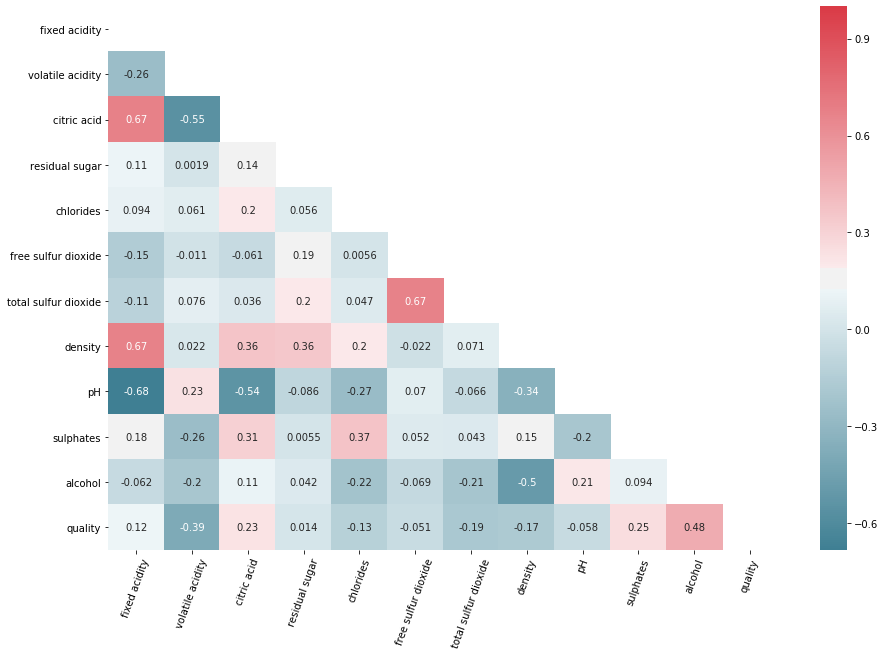

In [7]:
plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_table, mask=mask, cmap=cmap, annot=True)
plt.xticks(rotation=70)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['chlorides']],df[['free sulfur dioxide']])
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
residuals = y_test - y_pred

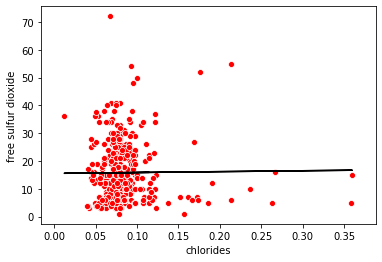

In [9]:
sns.scatterplot(x_test.iloc[:,0],y_test.iloc[:,0],color='red')
plt.plot(x_test.iloc[:,0],y_pred[:,0],color='black')
plt.show()

In [10]:
pd.concat([pd.DataFrame(y_test.values,columns=['actual']),pd.DataFrame(y_pred,columns=['predicted']),pd.DataFrame(residuals.values,columns=['residuals'])],axis=1)

,actual,predicted,residuals
0,22.0,15.907501,6.092499
1,5.0,15.850441,-10.850441
2,30.0,15.844101,14.155899
3,7.0,15.761680,-8.761680
4,17.0,15.844101,1.155899
5,9.0,15.818740,-6.818740
6,9.0,15.742659,-6.742659
7,30.0,15.802890,14.197110
8,12.0,15.768020,-3.768020
9,7.0,15.891651,-8.891651


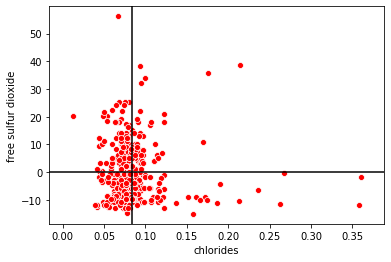

In [11]:
sns.scatterplot(x_test.iloc[:,0],residuals.iloc[:,0],color='red')
plt.axhline(y=np.mean(residuals.iloc[:,0]),color='black')
plt.axvline(x=np.mean(x_test.iloc[:,0]),color='black')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test.iloc[:,0], y_pred[:,0]))
print(r2_score(y_test.iloc[:,0], y_pred[:,0]))

106.38001131896367
-0.0012681776525609312


In [13]:
np.random.seed(20)
x=np.arange(20)
y=[xx*2+np.random.rand(1)*4 for xx in range(20)]
x_reshape=x.reshape(-1,1)

In [14]:
y

[array([2.3525232]),
 array([5.59085491]),
 array([7.56612292]),
 array([9.26334991]),
 array([8.14355834]),
 array([12.76703033]),
 array([13.51472377]),
 array([16.07404378]),
 array([18.63180586]),
 array([18.77540087]),
 array([21.08926561]),
 array([24.87442373]),
 array([27.13201444]),
 array([29.40131056]),
 array([31.10097958]),
 array([30.14665723]),
 array([32.46677494]),
 array([37.0051228]),
 array([36.95687286]),
 array([39.01922406])]

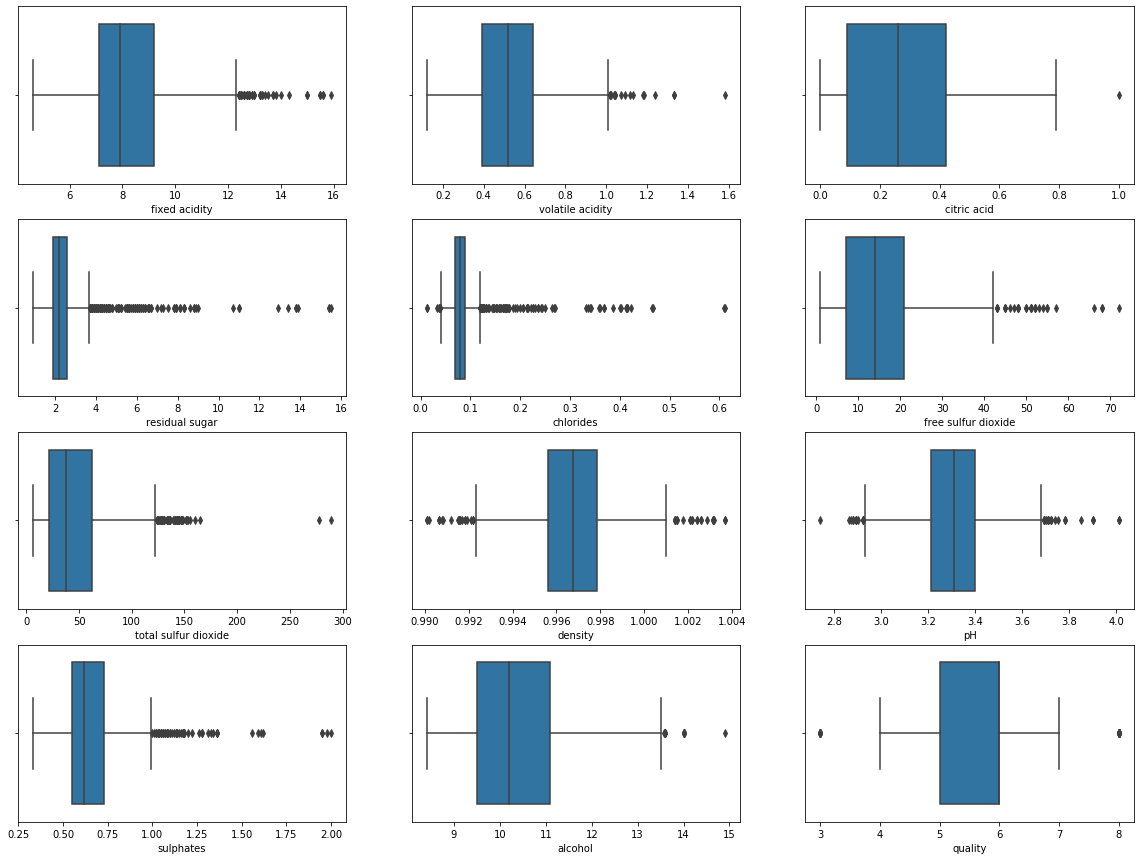

In [15]:
plt.figure(figsize=(20,15))
for i in range(len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[df.columns[i]])
plt.show()

In [16]:
temp = df[['residual sugar']]
temp.describe()

,residual sugar
count,1599.000000
mean,2.538806
std,1.409928
min,0.900000
25%,1.900000
50%,2.200000
75%,2.600000
max,15.500000


In [17]:
from scipy.stats import stats
stats.zscore(temp.head())
print(len(temp[(stats.zscore(temp,axis=0)<=-3) | (stats.zscore(temp,axis=0)>=3)]))
pd.DataFrame(temp[(stats.zscore(temp,axis=0)<=-3) | (stats.zscore(temp,axis=0)>=3)])

30


,residual sugar
33,10.7
163,7.3
164,7.2
274,7.0
324,11.0
325,11.0
396,7.9
400,7.9
480,15.5
494,8.3


1599


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145047ED748>]],
      dtype=object)

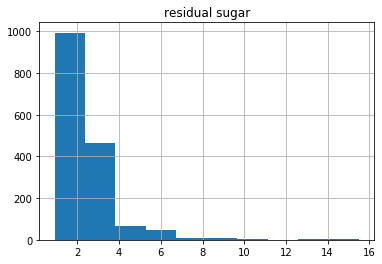

In [18]:
print(len(temp))
temp.hist()

1524


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145047B12B0>]],
      dtype=object)

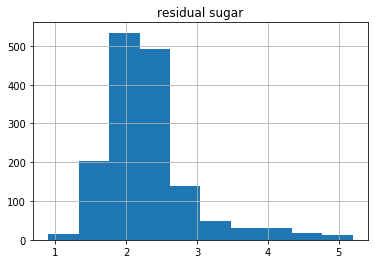

In [19]:
print(len(pd.DataFrame(temp[(stats.zscore(temp,axis=0)>-2) & (stats.zscore(temp,axis=0)<2)])))
pd.DataFrame(temp[(stats.zscore(temp,axis=0)>-2) & (stats.zscore(temp,axis=0)<2)]).hist()

In [20]:
import statsmodels.api as sm
const = sm.add_constant(x_train)
lr_model = sm.OLS(y_train,const).fit()
preds = lr_model.predict(sm.add_constant(x_test))

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
preds
print(lr_model.summary())

                             OLS Regression Results                            
Dep. Variable:     free sulfur dioxide   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.2785
Date:                 Thu, 26 Sep 2019   Prob (F-statistic):              0.598
Time:                         11:43:01   Log-Likelihood:                -4521.1
No. Observations:                 1199   AIC:                             9046.
Df Residuals:                     1197   BIC:                             9056.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5461      0.613     25.37

In [22]:
preds

46      15.907501
763     15.850441
878     15.844101
301     15.761680
294     15.844101
1148    15.818740
93      15.742659
53      15.802890
749     15.768020
875     15.891651
1417    15.749000
1078    15.799720
1076    15.777530
40      15.780700
12      15.828250
521     15.825080
69      15.780700
581     15.828250
697     15.755340
1126    15.745829
782     15.802890
1310    15.777530
1213    15.771190
668     15.733149
1435    16.224505
1133    15.828250
823     15.787040
454     15.745829
483     16.027963
1374    16.392517
          ...    
859     15.780700
1308    15.825080
1096    15.917012
99      15.799720
1011    15.825080
357     15.913842
1197    15.764850
78      15.818740
1567    15.787040
752     15.853611
990     15.853611
1495    15.799720
185     15.897991
1465    15.745829
1223    15.780700
536     15.790210
157     15.771190
321     15.831421
710     15.799720
104     15.768020
89      15.787040
899     15.812400
1481    15.875801
928     15.720469
220     15

In [23]:
pd.Series(y_pred[:,0])

0      15.907501
1      15.850441
2      15.844101
3      15.761680
4      15.844101
5      15.818740
6      15.742659
7      15.802890
8      15.768020
9      15.891651
10     15.749000
11     15.799720
12     15.777530
13     15.780700
14     15.828250
15     15.825080
16     15.780700
17     15.828250
18     15.755340
19     15.745829
20     15.802890
21     15.777530
22     15.771190
23     15.733149
24     16.224505
25     15.828250
26     15.787040
27     15.745829
28     16.027963
29     16.392517
         ...    
370    15.780700
371    15.825080
372    15.917012
373    15.799720
374    15.825080
375    15.913842
376    15.764850
377    15.818740
378    15.787040
379    15.853611
380    15.853611
381    15.799720
382    15.897991
383    15.745829
384    15.780700
385    15.790210
386    15.771190
387    15.831421
388    15.799720
389    15.768020
390    15.787040
391    15.812400
392    15.875801
393    15.720469
394    15.806060
395    15.771190
396    15.802890
397    15.8472

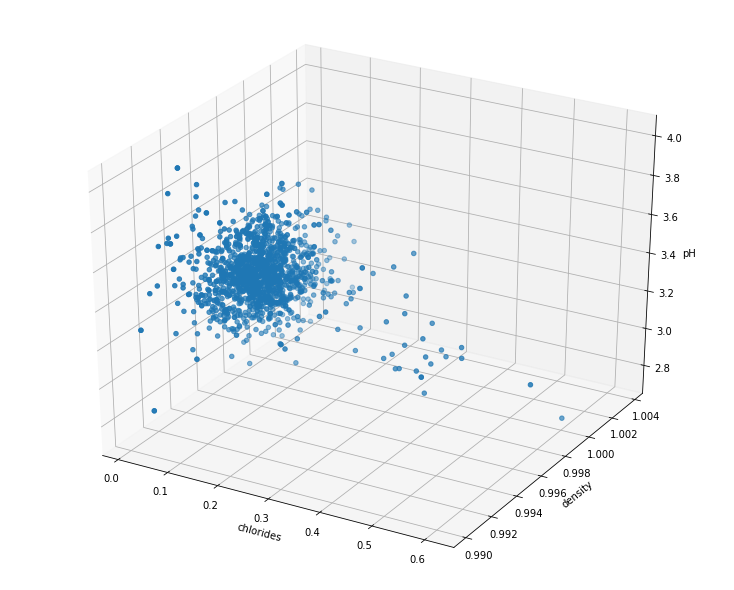

In [24]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure(figsize=(10,8)))
ax.scatter3D(df.chlorides,df.density,df.pH)
ax.set_xlabel('chlorides')
ax.set_ylabel('density')
ax.set_zlabel('pH')
plt.show()

In [25]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [26]:
X = np.array(df.chlorides)
Y = np.array(df.density)
Z = np.array(df.pH)
X, Y = np.meshgrid(X, Y)
Z, K = np.meshgrid(Z, np.array(df.chlorides))

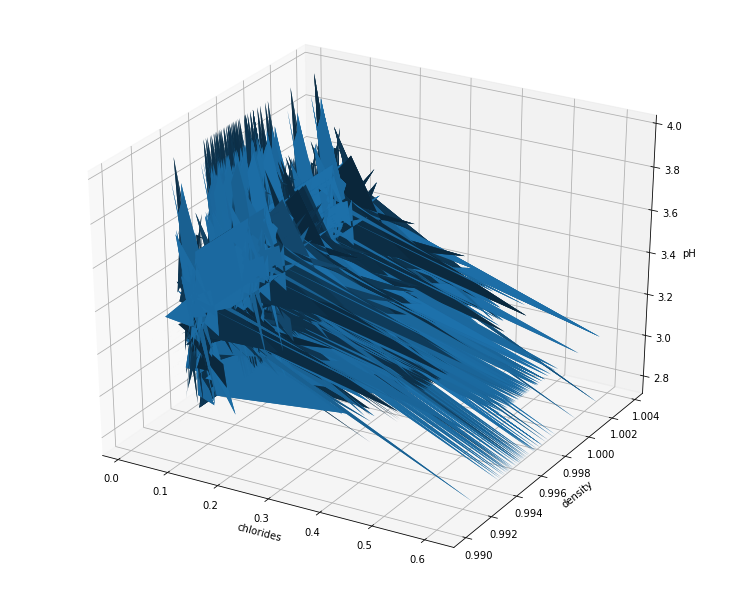

In [27]:
ax = Axes3D(plt.figure(figsize=(10,8)))
#ax.plot_surface(np.array(df.chlorides+3).reshape(-1,1),np.array(df.density+3).reshape(-1,1),np.array(df.pH).reshape(-1,1))
ax.plot_surface(X,Y,Z)
ax.set_xlabel('chlorides')
ax.set_ylabel('density')
ax.set_zlabel('pH')
plt.show()

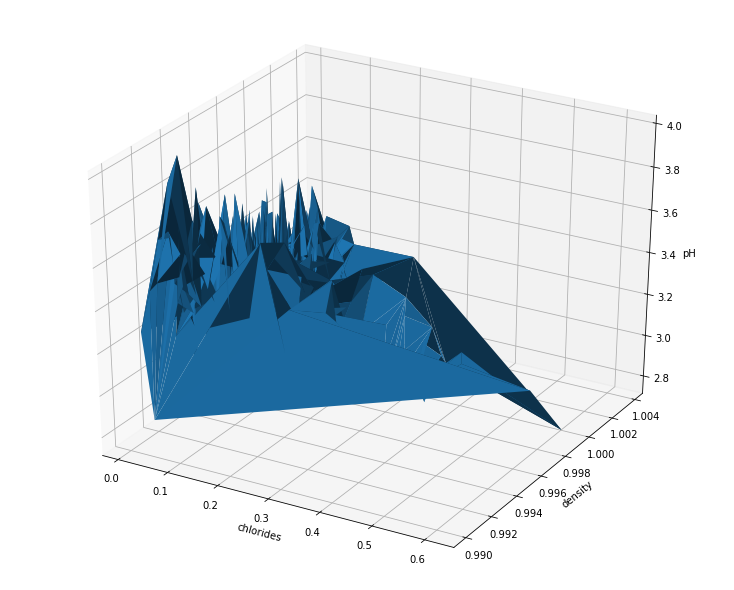

In [28]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure(figsize=(10,8)))
ax.plot_trisurf(np.array(df.chlorides),np.array(df.density),np.array(df.pH))
ax.set_xlabel('chlorides')
ax.set_ylabel('density')
ax.set_zlabel('pH')
plt.show()

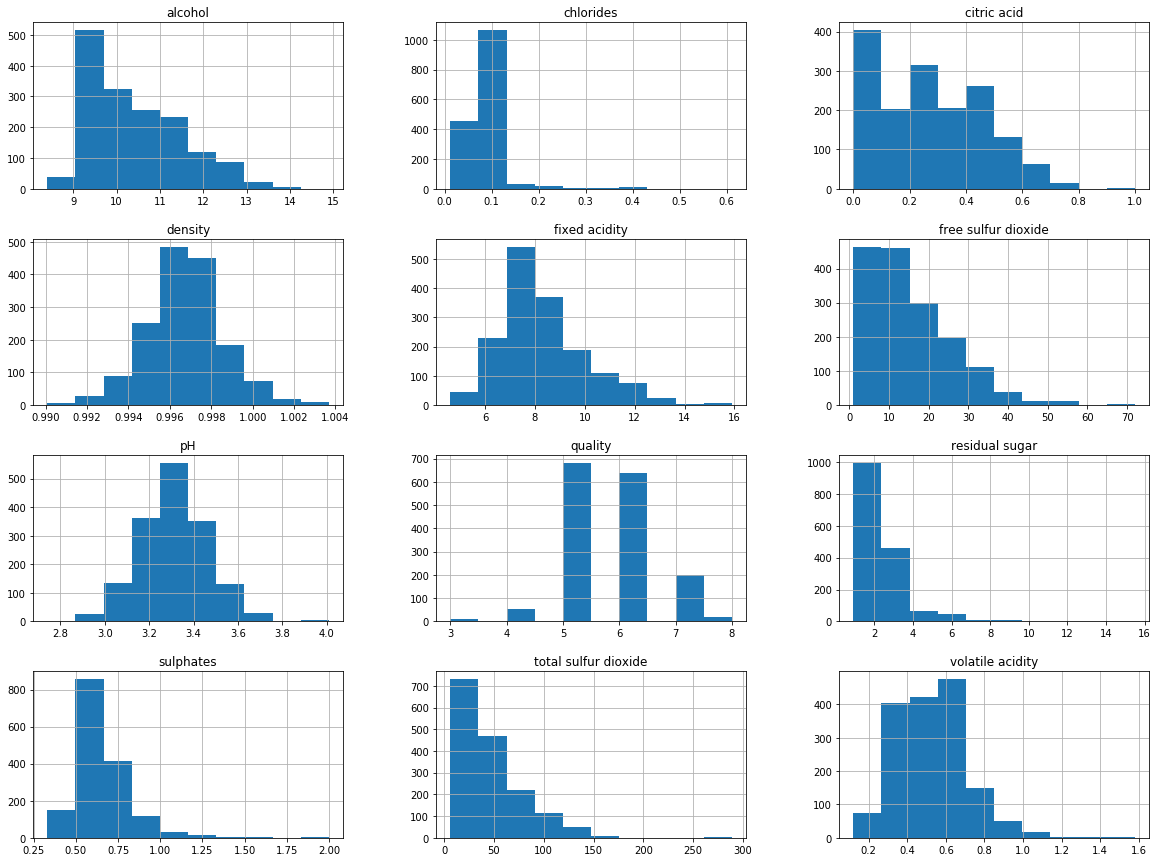

In [29]:
df.hist(figsize=(20,15))
plt.show()

In [397]:
from scipy.stats import shapiro
print(round(shapiro(df.density)[1],5))
shapiro(df.density)

0.0


(0.9908668398857117, 1.9400959061499634e-08)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


74.45531208173739

In [53]:
pd.DataFrame([variance_inflation_factor(df.values,i) for i in range(df.shape[1])],index=[df.columns],columns=['VIF'])

,VIF
fixed acidity,74.455312
volatile acidity,17.960867
citric acid,9.192549
residual sugar,4.664003
chlorides,6.641291
free sulfur dioxide,6.460603
total sulfur dioxide,6.605274
density,1528.154302
pH,1078.171089
sulphates,22.462103


In [54]:
np.argmax([variance_inflation_factor(df.values,i) for i in range(df.shape[1])])

7

In [57]:
for i in range(df.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [85]:
df_test = df.copy()
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
def calculate_VIF(new_df, thresh):
    cols = new_df.shape[1]
    for i in range(cols):
        vifs = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
        max_vif = np.argmax(vifs)
        #print(max_vif, vifs[max_vif], new_df.columns[max_vif])
        if vifs[max_vif] > thresh:
            print(max_vif, vifs[max_vif], new_df.columns[max_vif])
            new_df.drop(new_df.columns[max_vif], axis=1, inplace=True)
            #new_df.head()
        else:
            break
    return new_df

In [87]:
calculate_VIF(df_test, 10)

7 1528.1543016133344 density
7 165.65706292299683 pH
8 84.45855609922971 alcohol
0 39.3792225075336 fixed acidity
7 25.86841083201501 quality
6 12.942897035314433 sulphates


,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.700,0.00,1.9,0.076,11.0,34.0
1,0.880,0.00,2.6,0.098,25.0,67.0
2,0.760,0.04,2.3,0.092,15.0,54.0
3,0.280,0.56,1.9,0.075,17.0,60.0
4,0.700,0.00,1.9,0.076,11.0,34.0
5,0.660,0.00,1.8,0.075,13.0,40.0
6,0.600,0.06,1.6,0.069,15.0,59.0
7,0.650,0.00,1.2,0.065,15.0,21.0
8,0.580,0.02,2.0,0.073,9.0,18.0
9,0.500,0.36,6.1,0.071,17.0,102.0


In [88]:
[variance_inflation_factor(df_test.values,i) for i in range(df_test.shape[1])]

[5.412721555910782,
 3.0392510357422844,
 4.466726784622796,
 4.808248870022063,
 5.71729545490714,
 5.653977664461059]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df_test, df[['alcohol']])
#sm.OLS(sm.add_constant)

In [106]:
lr_model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
y_pred = lr_model.predict(sm.add_constant(x_test))

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
mean_squared_error(y_test,y_pred)

0.9107710257525539

In [110]:
r2_score(y_test,y_pred)

0.12403143497354041

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     31.87
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           1.07e-35
Time:                        13:38:33   Log-Likelihood:                -1704.5
No. Observations:                1199   AIC:                             3423.
Df Residuals:                    1192   BIC:                             3459.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1447      0.150     74.261      0.000      10.850      11.439
volatile acidity        -0.6684      0.201     -3.330      0.001      -1.062      -0.275
citric acid              0.5682      0.191      2.972      0.003       0.193       0.943
residual sugar           0.0813      0.022      3.687      0.000       0.038       0.125
chlorides               -5.0874      0.623     -8.162      0.000      -6.310      -3.865
free sulfur dioxide      0.0084      0.004      2.186      0.029       0.001       0.016
total sulfur dioxide    -0.0088      0.001     -7.350      0.000      -0.011      -0.006
==============================================================================
Omnibus:                      130.780   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.956
Skew:                           0.848   Prob(JB):                     2.28e-39
Kurtosis:                       3.829   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""